# Traffic Sign Classification


In this project, deep neural networks and convolutional neural networks are applied to classify german traffic signs. 

## Load Data

Load the German Traffic Sign Dataset. 
[This dataset has more than 40 classes of images with more than 50,000 images in total:
(http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)]

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Split the Validation set from the training set using the sklearn library
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### VIsualize the dataset

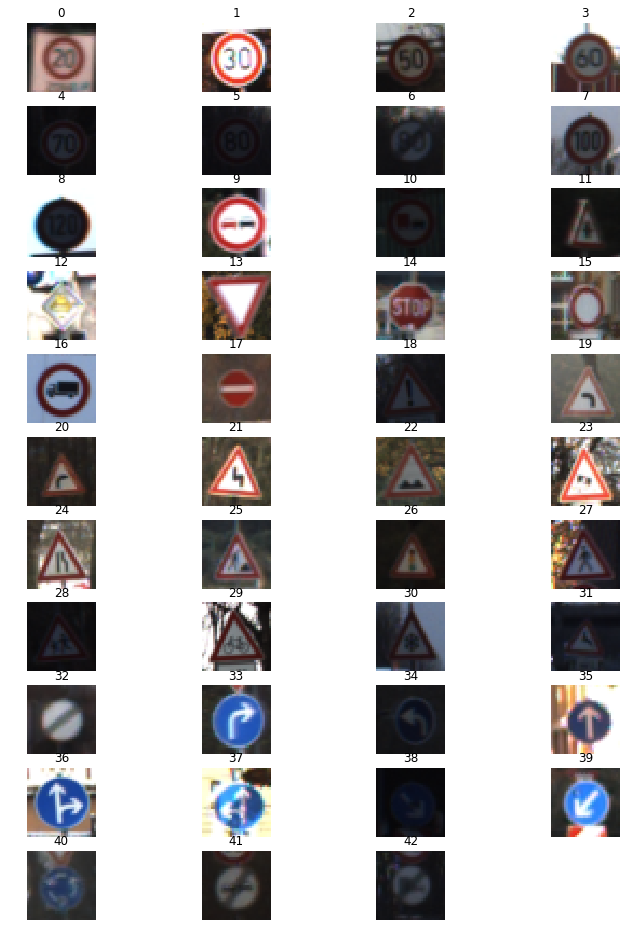

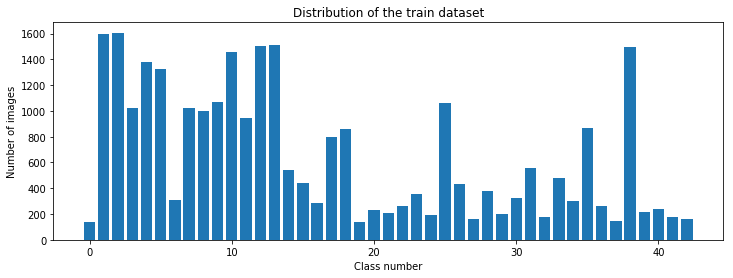

Min number of images per class = 141
Max number of images per class = 1607


In [3]:
%matplotlib inline

n_classes = len(np.unique(y_train))
num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

## View a sample from the dataset.


11


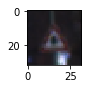

In [4]:

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.
Tuned the epochs to be 100 and batch size to be 256

In [6]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 256

## SOLUTION Architecture

### Input

The architecture accepts a 32x32xC image as input, where C is the number of color channels. The german traffic dataset has colors and therefore the number of color channels is 3.

### Architecture

**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** RELU Activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** RELU Activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** RELU Activation function

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** RELU Activation function

**Dropout.** Dropout to avoid overfitting.
 
**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [7]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout 
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train to classify Traffic Sign.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify German Traffic Signs dataset.

In [9]:
rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.
Save the model after training.

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.224

EPOCH 2 ...
Validation Accuracy = 0.426

EPOCH 3 ...
Validation Accuracy = 0.568

EPOCH 4 ...
Validation Accuracy = 0.646

EPOCH 5 ...
Validation Accuracy = 0.714

EPOCH 6 ...
Validation Accuracy = 0.759

EPOCH 7 ...
Validation Accuracy = 0.793

EPOCH 8 ...
Validation Accuracy = 0.823

EPOCH 9 ...
Validation Accuracy = 0.848

EPOCH 10 ...
Validation Accuracy = 0.865

EPOCH 11 ...
Validation Accuracy = 0.878

EPOCH 12 ...
Validation Accuracy = 0.883

EPOCH 13 ...
Validation Accuracy = 0.888

EPOCH 14 ...
Validation Accuracy = 0.896

EPOCH 15 ...
Validation Accuracy = 0.906

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 17 ...
Validation Accuracy = 0.923

EPOCH 18 ...
Validation Accuracy = 0.919

EPOCH 19 ...
Validation Accuracy = 0.923

EPOCH 20 ...
Validation Accuracy = 0.930

EPOCH 21 ...
Validation Accuracy = 0.935

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.936

EPOCH 24 ...
Validation Accura

## Evaluate the Model

Evaluate the performance of the model on the test set.

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.899


#### Acquire new images
Get new images from the Web and visualize them.

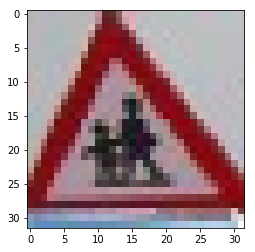

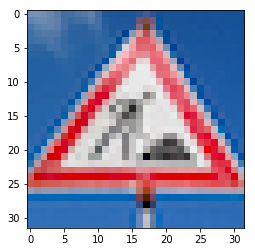

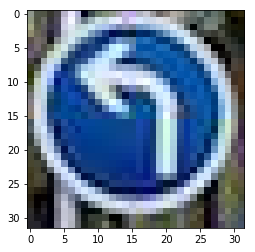

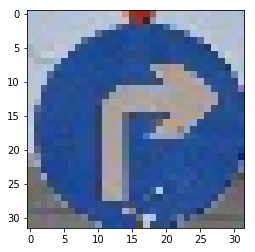

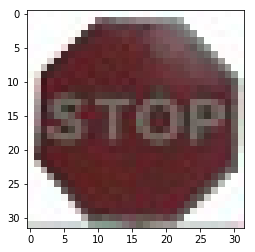

In [13]:
import os
import matplotlib.image as mpimg
new_images = os.listdir("new_images/")
# Drop the mac's created '.DS_Store' file
new_images = new_images[1:6]

# Show the images, add to a list to process for classifying
new_images_data = []
for i in new_images:
    i = 'new_images/' + i
    image = mpimg.imread(i)
    new_images_data.append(image)
    plt.imshow(image)
    plt.show()

In [14]:
new_images_data = np.array(new_images_data)

# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
print(new_images_data.shape)

(5, 32, 32, 3)


#### Run the saved model with the new data

In [15]:
import pandas as pd
df = pd.read_csv("./signnames.csv")
np_df = df.as_matrix()
save_file = './lenet'
with tf.Session() as sess:
    saver.restore(sess, save_file)
    new_images_classes = sess.run(logits, feed_dict={x: new_images_data,  keep_prob : 1.0})

INFO:tensorflow:Restoring parameters from ./lenet


#### Predict the objects that the new images are likely to be:

In [16]:
image_list = []
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_images_classes, k=5, sorted=True))   
for i in range(len(predicts[0])):
    indx = predicts[1][i][0]
    image_list.append(np_df[indx][1])

##### Predict what the images would  likely be

In [17]:
print("The images are most likely " , image_list)

The images are most likely  ['End of all speed and passing limits', 'Road work', 'Speed limit (120km/h)', 'Turn right ahead', 'Stop']


Print out the top five softmax probabilities

In [18]:
### Print out the top five softmax probabilities for the predictions
### on the German traffic sign images found on the web. 
softmax = tf.nn.softmax(logits)
pred = tf.nn.top_k(softmax, 5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    result = sess.run(pred, feed_dict={x: batch_x, keep_prob: 1.})
    predictions  = result.values
    predictionIndicies  = result.indices
    np.set_printoptions(precision=5, suppress=True)
    
    print("Predictions:\n {}".format(predictions))
    print("Labels:\n {}".format(predictionIndicies))

INFO:tensorflow:Restoring parameters from ./lenet
Predictions:
 [[ 0.99853  0.00147  0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 0.99997  0.00003  0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 0.99971  0.00029  0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 0.99918  0.00082  0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0.       0.       0.     ]
 [ 1.       0.       0. 